##### 3. Exploratory Data Analysis (EDA)

- 1 How does the distribution of startups vary across different states? (Location)
- 2 Which industry categories have the highest success rates among startups?? (Industries)
- 3 How does the total funding amount correlate with the success of startups? (Financial Backing)
- 4 Is there a correlation between the age of a startup and its success? (Maturity)
- 5 How do Relationships and Networking Impact Success? (Relationships)
- 6 How Does the Presence of Venture Capital Impact Success? (Venture Capital) - Finacing the startup with some risk

In [1550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1551]:
notebook_directory = '/Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook'
file_path = os.path.join(notebook_directory, '..', 'data', 'startup.csv')
clean_data = pd.read_csv(file_path, encoding="ISO-8859-1")

In [1552]:
clean_data['status'] = clean_data.status.map({'acquired':1, 'closed':0})
clean_data.head(10)
clean_data.rename(columns={'status':'is_acquired'}, inplace=True)
clean_data

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,1
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,0
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,0
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,1


Learn how to interpret and explain what did you do to select only the variables that are relevant

 ##### 1. How does the distribution of startups vary across different states? (Location) check

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_29384/3601325464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")


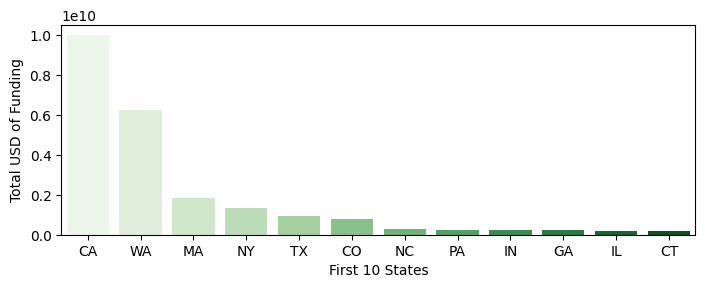

In [1553]:
df_state = clean_data.groupby(["state_code"])["funding_total_usd"].sum().sort_values(ascending=False).reset_index().head(12)

plt.figure(figsize=(18, 6), dpi=100)
plt.subplot(2, 2, 1)
plt.ylabel("Total USD of Funding")
plt.xlabel("First 10 States")
sns.barplot(x=df_state["state_code"], y=df_state["funding_total_usd"], palette="Greens")
plt.show()

##### 2. Which industry categories have the highest success rates among startups?? (Industries) check

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_29384/149967199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category_code", data=clean_data, order=order, palette="pastel", legend=False)


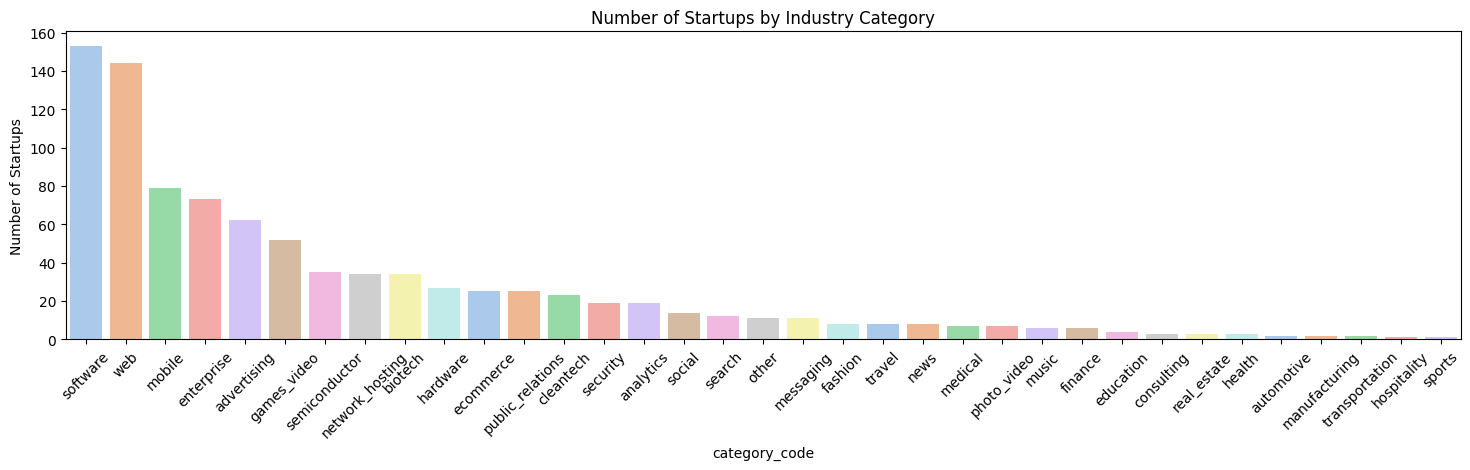

In [1554]:
import matplotlib.pyplot as plt
import seaborn as sns
order = clean_data["category_code"].value_counts().index

plt.figure(figsize=(18, 4), dpi=100)
plt.xticks(rotation=45)
plt.title("Number of Startups by Industry Category")

sns.countplot(x="category_code", data=clean_data, order=order, palette="pastel", legend=False)
plt.ylabel("Number of Startups")
plt.show()

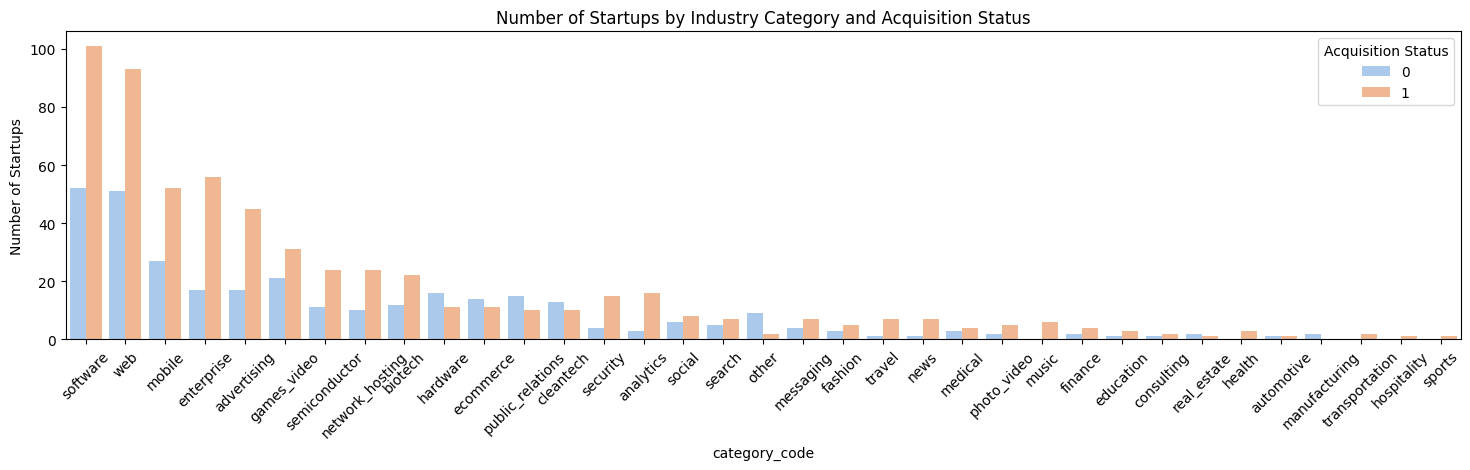

In [1555]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the order of categories based on their counts
order = clean_data["category_code"].value_counts().index

# Set the order of the legend
legend_order = [1, 0]  # Change the order if needed

# Create a custom color palette with the desired order
palette = sns.color_palette("pastel", n_colors=len(legend_order))
sns.set_palette([palette[i] for i in legend_order])

# Create a count plot with "is_acquired" information
plt.figure(figsize=(18, 4), dpi=100)
plt.xticks(rotation=45)
plt.title("Number of Startups by Industry Category and Acquisition Status")

# Stacked bar plot using hue for "is_acquired"
sns.countplot(x="category_code", data=clean_data, order=order, hue="is_acquired", palette='pastel')

plt.ylabel("Number of Startups")

# Create a new legend with the custom order
plt.legend(title="Acquisition Status", loc="upper right")

plt.show()



In [1556]:
# Assuming you have a DataFrame called 'data'
count_acquired_closed = clean_data['is_acquired'].value_counts()
# Print the count with labels
print(f'Acquired: {count_acquired_closed[1]}, Closed: {count_acquired_closed[0]}')

Acquired: 597, Closed: 326


##### 3. Cleaning the data 

**Drop the irrelevant features from 48 columns**

In [1557]:
clean_data = clean_data.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
clean_data

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,music,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,enterprise,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,web,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,software,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,games_video,1,1,0,0,0,0,1.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,...,advertising,0,0,1,0,0,0,6.0000,1,1
919,MA,Burlington,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,...,security,1,0,0,1,0,0,2.6667,1,0
920,CA,Sunnyvale,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,...,biotech,0,0,0,0,0,1,8.0000,1,0
921,CA,San Francisco,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,...,software,0,0,1,1,0,0,1.0000,1,1


In [1558]:
num_columns = len(clean_data.columns)
print(f"After dropping irrelevant features The DataFrame has {num_columns} columns.")

After dropping irrelevant features The DataFrame has 24 columns.


**Handle missing values**

The second step consists on eliminating noisy or unreliable data being the two most common cases
of inconsistencies, Missing Values and Outliers. 

A Missing value (or missing data) is a variable that has no data value stored in an observation. Missing values are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data. 

In [1559]:
x= clean_data.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
is_acquired                   0
dtype: int64

In [1560]:
# 2. Impute missing values with 0 to 'age_first_milestone_year'
clean_data['age_first_milestone_year'].fillna(0, inplace=True)

# 3. Impute missing values with 0 to 'age_last_milestone_year'
clean_data['age_last_milestone_year'].fillna(0, inplace=True)

**General Changes:*

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
- Handling Missing Values in 'closed_at': Missing values in 'closed_at' represent startups that are still open and will not be filled. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.

 ##### 4. Correlation between variables without categorical values 

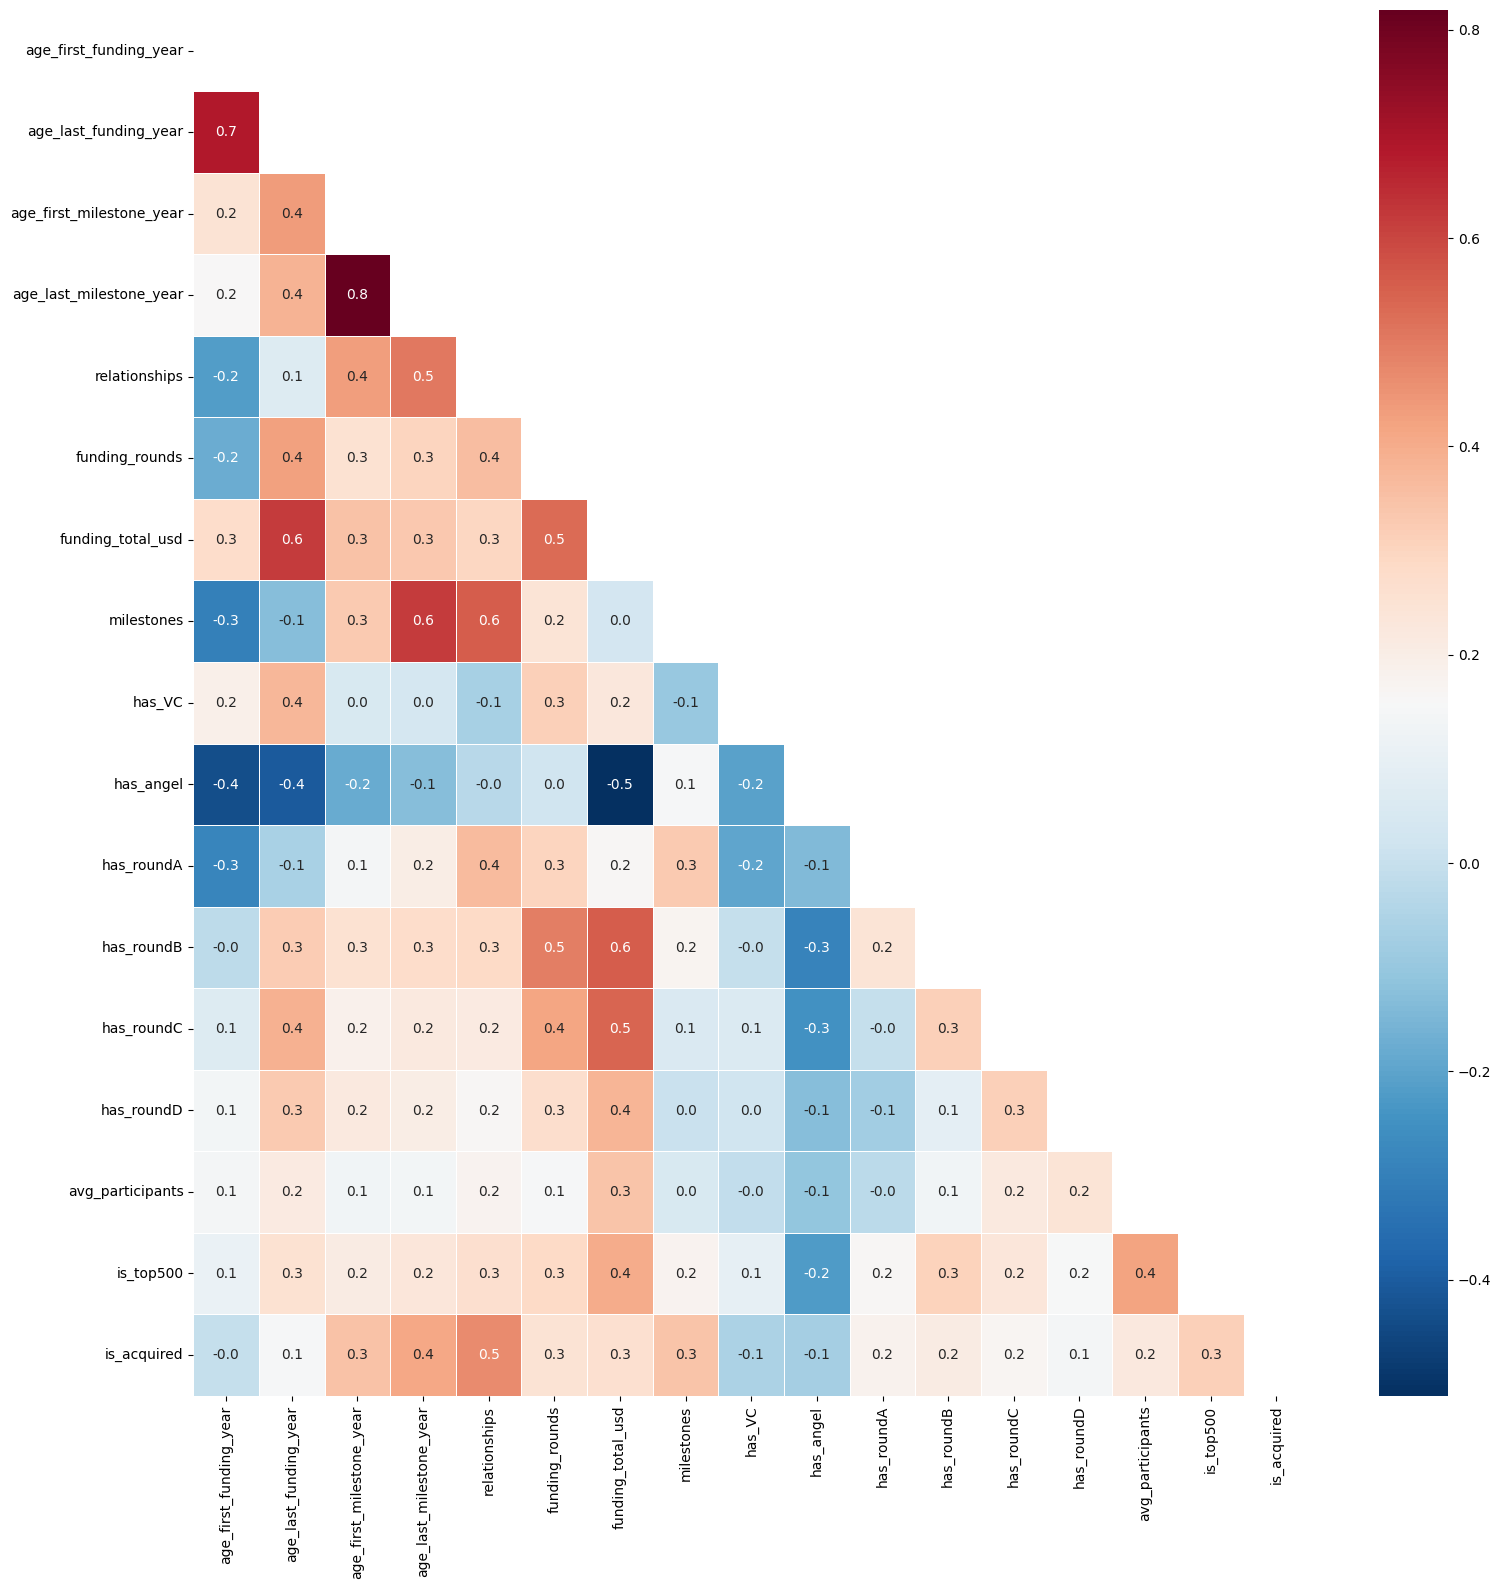

In [1561]:
def draw_heatmap(clean_data):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = clean_data.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df_1 = clean_data.select_dtypes(numerics)

draw_heatmap(numerical_df_1)



##### 5. Data Transformation

Converting Datetime to Numerical values

- Following variables : 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'

In [1562]:
# Sort DataFrame by 'closed_at' in descending order
clean_data.sort_values(by='closed_at', ascending=False, inplace=True)

In [1563]:
# Find the first non-null value in the sorted 'closed_at' column
last_closed_startup = clean_data['closed_at'].dropna().iloc[0]

In [1564]:
# Print the result
print("Last startup that closed:", last_closed_startup)

Last startup that closed: 9/8/2013


In [1565]:
import pandas as pd
from datetime import datetime
# Assuming your_data_df is your main DataFrame
data_df = clean_data

# List of date columns
date_columns = ['founded_at','closed_at', 'first_funding_at', 'last_funding_at']

# Convert date columns to datetime
for date_column in date_columns:
    data_df[date_column] = pd.to_datetime(data_df[date_column], errors='coerce')

# Sort DataFrame by 'closed_at' in descending order
data_df.sort_values(by='closed_at', ascending=False, inplace=True)

# Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]

# Fill missing values in 'closed_at' with the last closing date
data_df['closed_at'].fillna(last_closed_date, inplace=True)

# Calculate the age of the startup based on the 'founded_at' and 'closed_at' (or current date)
current_date = datetime.now()
data_df['age'] = (data_df['closed_at'] - data_df['founded_at']).dt.days

In [1566]:
last_closed_date

Timestamp('2013-10-30 00:00:00')

In [1567]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
609,CA,Mountain View,2009-07-27,2013-10-30,2009-06-01,2011-11-29,-0.1534,2.3425,0.0630,1.5836,...,0,1,1,0,0,0,3.5,1,0,1556
633,CA,San Diego,2007-07-01,2013-10-15,2007-09-18,2012-05-03,0.2164,4.8438,0.2164,6.2466,...,1,0,1,1,1,0,4.2,1,0,2298
631,NY,New York,2009-01-01,2013-09-27,2010-11-19,2010-11-19,1.8822,1.8822,1.6603,3.0247,...,0,0,1,0,0,0,7.0,1,0,1730
899,NY,New York,2010-09-01,2013-09-08,2011-12-20,2013-02-18,1.3014,2.4685,0.0000,2.4685,...,1,1,0,0,0,0,5.0,1,0,1103
741,CA,San Francisco,2011-01-01,2013-09-06,2012-03-20,2012-03-20,1.2164,1.2164,1.4164,2.6822,...,0,0,1,0,0,0,8.0,1,0,979
139,CA,San Francisco,2005-01-01,2013-08-20,2005-07-29,2005-07-29,0.5726,0.5726,5.1671,8.0082,...,0,0,1,0,0,0,3.0,0,0,3153
114,CA,San Diego,2010-10-01,2013-08-08,2011-04-13,2012-09-01,0.5315,1.9205,2.2548,2.9781,...,1,1,0,0,0,0,4.0,1,0,1042
23,CA,San Francisco,2008-01-01,2013-08-02,2007-01-01,2011-04-25,-1.0000,3.3151,3.6959,5.6630,...,0,1,1,0,0,0,2.0,0,0,2040
107,IL,Chicago,2011-08-01,2013-08-01,2012-08-13,2012-08-13,1.0356,1.0356,0.0000,1.0356,...,0,1,0,0,0,0,1.0,0,0,731
235,MI,Bingham Farms,2003-01-01,2013-08-01,2008-02-20,2008-02-20,5.1397,5.1397,7.0055,7.0055,...,1,0,0,0,0,0,1.0,0,0,3865


In [1568]:
print(clean_data['closed_at'].head(10))

609   2013-10-30
633   2013-10-15
631   2013-09-27
899   2013-09-08
741   2013-09-06
139   2013-08-20
114   2013-08-08
23    2013-08-02
107   2013-08-01
235   2013-08-01
Name: closed_at, dtype: datetime64[ns]


In [1569]:
print(clean_data['closed_at'].tail(10))

908   2013-10-30
909   2013-10-30
910   2013-10-30
912   2013-10-30
914   2013-10-30
916   2013-10-30
917   2013-10-30
918   2013-10-30
921   2013-10-30
922   2013-10-30
Name: closed_at, dtype: datetime64[ns]


In [1570]:
# Convert datetime to timestamp (numerical)
for date_column in date_columns:
    data_df[date_column] = data_df[date_column].astype(int)

In [1571]:
print(clean_data['closed_at'].tail(10))

908    1383091200000000000
909    1383091200000000000
910    1383091200000000000
912    1383091200000000000
914    1383091200000000000
916    1383091200000000000
917    1383091200000000000
918    1383091200000000000
921    1383091200000000000
922    1383091200000000000
Name: closed_at, dtype: int64


In [1572]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
609,CA,Mountain View,1248652800000000000,1383091200000000000,1243814400000000000,1322524800000000000,-0.1534,2.3425,0.0630,1.5836,...,0,1,1,0,0,0,3.5,1,0,1556
633,CA,San Diego,1183248000000000000,1381795200000000000,1190073600000000000,1336003200000000000,0.2164,4.8438,0.2164,6.2466,...,1,0,1,1,1,0,4.2,1,0,2298
631,NY,New York,1230768000000000000,1380240000000000000,1290124800000000000,1290124800000000000,1.8822,1.8822,1.6603,3.0247,...,0,0,1,0,0,0,7.0,1,0,1730
899,NY,New York,1283299200000000000,1378598400000000000,1324339200000000000,1361145600000000000,1.3014,2.4685,0.0000,2.4685,...,1,1,0,0,0,0,5.0,1,0,1103
741,CA,San Francisco,1293840000000000000,1378425600000000000,1332201600000000000,1332201600000000000,1.2164,1.2164,1.4164,2.6822,...,0,0,1,0,0,0,8.0,1,0,979
139,CA,San Francisco,1104537600000000000,1376956800000000000,1122595200000000000,1122595200000000000,0.5726,0.5726,5.1671,8.0082,...,0,0,1,0,0,0,3.0,0,0,3153
114,CA,San Diego,1285891200000000000,1375920000000000000,1302652800000000000,1346457600000000000,0.5315,1.9205,2.2548,2.9781,...,1,1,0,0,0,0,4.0,1,0,1042
23,CA,San Francisco,1199145600000000000,1375401600000000000,1167609600000000000,1303689600000000000,-1.0000,3.3151,3.6959,5.6630,...,0,1,1,0,0,0,2.0,0,0,2040
107,IL,Chicago,1312156800000000000,1375315200000000000,1344816000000000000,1344816000000000000,1.0356,1.0356,0.0000,1.0356,...,0,1,0,0,0,0,1.0,0,0,731
235,MI,Bingham Farms,1041379200000000000,1375315200000000000,1203465600000000000,1203465600000000000,5.1397,5.1397,7.0055,7.0055,...,1,0,0,0,0,0,1.0,0,0,3865


Converting categorical to Numerical values
- Following variables : 'state_code', 'city', 'category_code'

In [1573]:
import pandas as pd

# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code']

# Create a function to generate mappings
def create_mapping(column):
    unique_values = clean_data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    clean_data[column] = clean_data[column].map(mapping)

In [1574]:
clean_data.head(10)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,age
609,0,0,1248652800000000000,1383091200000000000,1243814400000000000,1322524800000000000,-0.1534,2.3425,0.0630,1.5836,...,0,1,1,0,0,0,3.5,1,0,1556
633,0,1,1183248000000000000,1381795200000000000,1190073600000000000,1336003200000000000,0.2164,4.8438,0.2164,6.2466,...,1,0,1,1,1,0,4.2,1,0,2298
631,1,2,1230768000000000000,1380240000000000000,1290124800000000000,1290124800000000000,1.8822,1.8822,1.6603,3.0247,...,0,0,1,0,0,0,7.0,1,0,1730
899,1,2,1283299200000000000,1378598400000000000,1324339200000000000,1361145600000000000,1.3014,2.4685,0.0000,2.4685,...,1,1,0,0,0,0,5.0,1,0,1103
741,0,3,1293840000000000000,1378425600000000000,1332201600000000000,1332201600000000000,1.2164,1.2164,1.4164,2.6822,...,0,0,1,0,0,0,8.0,1,0,979
139,0,3,1104537600000000000,1376956800000000000,1122595200000000000,1122595200000000000,0.5726,0.5726,5.1671,8.0082,...,0,0,1,0,0,0,3.0,0,0,3153
114,0,1,1285891200000000000,1375920000000000000,1302652800000000000,1346457600000000000,0.5315,1.9205,2.2548,2.9781,...,1,1,0,0,0,0,4.0,1,0,1042
23,0,3,1199145600000000000,1375401600000000000,1167609600000000000,1303689600000000000,-1.0000,3.3151,3.6959,5.6630,...,0,1,1,0,0,0,2.0,0,0,2040
107,2,4,1312156800000000000,1375315200000000000,1344816000000000000,1344816000000000000,1.0356,1.0356,0.0000,1.0356,...,0,1,0,0,0,0,1.0,0,0,731
235,3,5,1041379200000000000,1375315200000000000,1203465600000000000,1203465600000000000,5.1397,5.1397,7.0055,7.0055,...,1,0,0,0,0,0,1.0,0,0,3865


In [1575]:
numerical_features = clean_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = clean_data.select_dtypes(include=['object']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (25):
['state_code', 'city', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'is_acquired', 'age']

Categorical Features (0):
[]

Target Variable (1):
['status']


 ##### 6. Correlation between variables with categorical values 

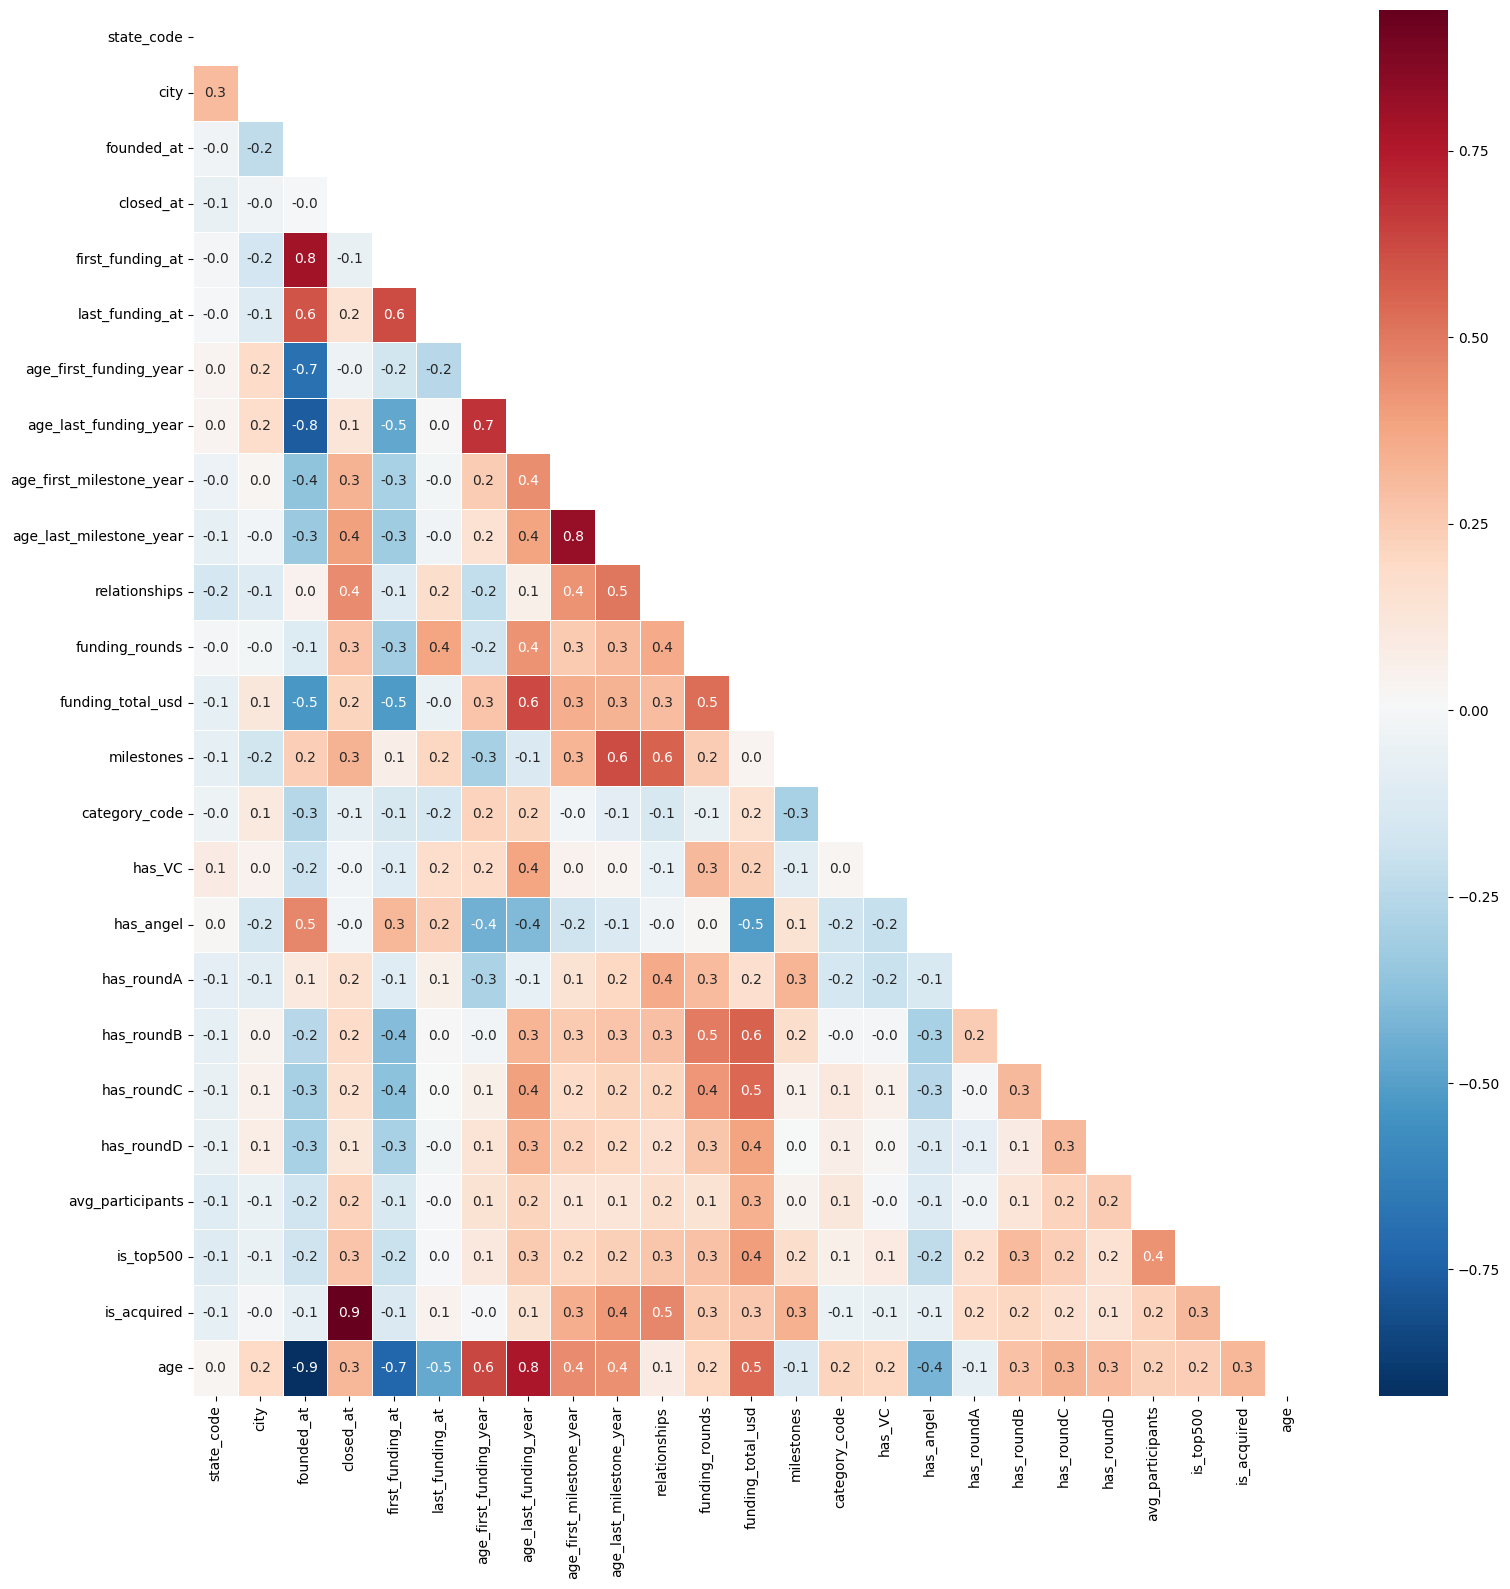

In [1576]:
def draw_heatmap(clean_data):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = clean_data.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df_1 = clean_data.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

##### 7. Is there a correlation between the age('founded_at - closed_at) of a startup and its success(is_acquire)? (Maturity)** need to add variable age 

In [1577]:
print(clean_data['founded_at'].head(10))

609    1248652800000000000
633    1183248000000000000
631    1230768000000000000
899    1283299200000000000
741    1293840000000000000
139    1104537600000000000
114    1285891200000000000
23     1199145600000000000
107    1312156800000000000
235    1041379200000000000
Name: founded_at, dtype: int64


##### 8. How does the total funding amount correlate with the success of startups? (Financial Backing) check

correlation coefficient between a binary variable (like 'is_acquired') and a continuous variable (like 'funding_total_usd')

In [1578]:
print(clean_data['funding_total_usd'].head(10))

609     3000000
633    70000000
631     1000000
899     1800000
741     5500000
139    15000000
114     2100000
23      2300000
107     1000000
235     5000000
Name: funding_total_usd, dtype: int64


In [1579]:
print(clean_data['is_acquired'].head(10))

609    0
633    0
631    0
899    0
741    0
139    0
114    0
23     0
107    0
235    0
Name: is_acquired, dtype: int64


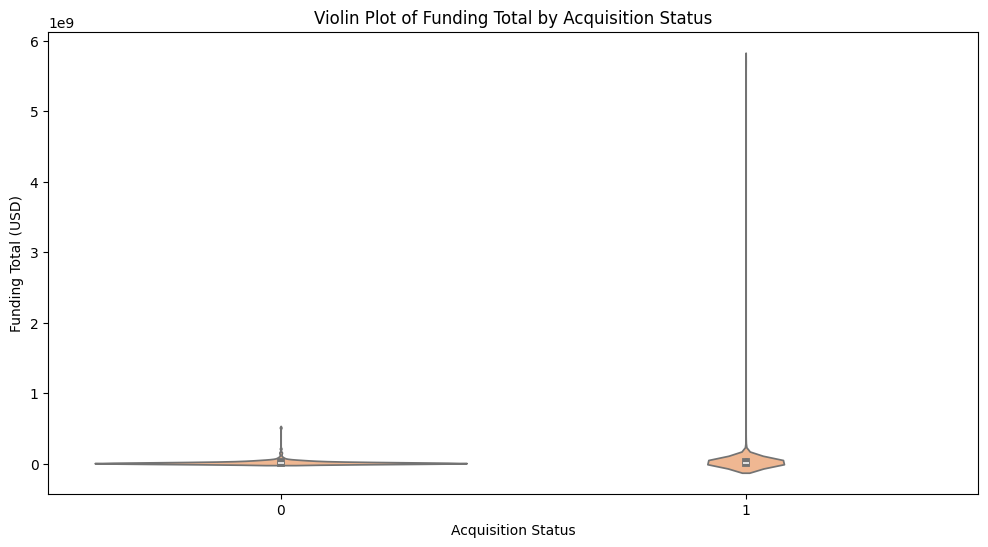

In [1580]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='is_acquired', y='funding_total_usd', data=clean_data)
plt.title('Violin Plot of Funding Total by Acquisition Status')
plt.xlabel('Acquisition Status')
plt.ylabel('Funding Total (USD)')
plt.show()


##### 9. How do Relationships and Networking Impact Success? (Relationships)** check

In [1581]:
print(clean_data['relationships'].head(10))

609     8
633    22
631     5
899     3
741     6
139    12
114    12
23      4
107     2
235     2
Name: relationships, dtype: int64


In [1582]:
print(clean_data['is_acquired'].head(10))

609    0
633    0
631    0
899    0
741    0
139    0
114    0
23     0
107    0
235    0
Name: is_acquired, dtype: int64


##### 10. How Does the Presence of Venture Capital Impact Success? (Venture Capital) - Finacing the startup with some risk.** check

In [1583]:
print(clean_data['has_VC'].head(10))

609    0
633    1
631    0
899    1
741    0
139    0
114    1
23     0
107    0
235    1
Name: has_VC, dtype: int64


In [1584]:
print(clean_data['is_acquired'].head(10))

609    0
633    0
631    0
899    0
741    0
139    0
114    0
23     0
107    0
235    0
Name: is_acquired, dtype: int64
